<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/DecisionTreeAssgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
df = df.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


###Creating a New Column is_Check(Risky:if taxable_income<=30000,Good:if taxable_income>30000) to create Decision Tree Based on given Condition

In [7]:
df['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in df['taxable_income']]

In [8]:
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


###Use Lable Encoder for Columns with Categorical data

In [9]:
lable_encoder = preprocessing.LabelEncoder()
df['Risky'] = lable_encoder.fit_transform(df['is_Check'])

In [10]:
df['Mar_status'] = lable_encoder.fit_transform(df.marital_status)

In [11]:
df['Graduate'] = lable_encoder.fit_transform(df.Undergrad)

In [12]:
df['urban'] = lable_encoder.fit_transform(df.Urban)

In [13]:
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check,Risky,Mar_status,Graduate,urban
0,NO,Single,68833,50047,10,YES,Good,0,2,0,1
1,YES,Divorced,33700,134075,18,YES,Good,0,0,1,1
2,NO,Married,36925,160205,30,YES,Good,0,1,0,1
3,YES,Single,50190,193264,15,YES,Good,0,2,1,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,0,0,1,1
596,YES,Divorced,69967,55369,2,YES,Good,0,0,1,1
597,NO,Divorced,47334,154058,0,YES,Good,0,0,0,1
598,YES,Married,98592,180083,17,NO,Good,0,1,1,0


In [14]:
df = df.drop(['Undergrad','marital_status','Urban','is_Check','taxable_income'],axis=1)

In [15]:
df

,city_population,work_exp,Risky,Mar_status,Graduate,urban
0,50047,10,0,2,0,1
1,134075,18,0,0,1,1
2,160205,30,0,1,0,1
3,193264,15,0,2,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,0,0,1,1
596,55369,2,0,0,1,1
597,154058,0,0,0,0,1
598,180083,17,0,1,1,0


###Rearranging Order of Dataframe

In [16]:
df=df[['city_population','work_exp',"Mar_status",'Graduate','urban','Risky']]
df

,city_population,work_exp,Mar_status,Graduate,urban,Risky
0,50047,10,2,0,1,0
1,134075,18,0,1,1,0
2,160205,30,1,0,1,0
3,193264,15,2,1,1,0
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,1,1,0
596,55369,2,0,1,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [17]:
X = df.iloc[:,0:5]
Y = df.iloc[:,5]

In [18]:
X

,city_population,work_exp,Mar_status,Graduate,urban
0,50047,10,2,0,1
1,134075,18,0,1,1
2,160205,30,1,0,1
3,193264,15,2,1,1
4,27533,28,1,0,0
...,...,...,...,...,...
595,39492,7,0,1,1
596,55369,2,0,1,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [19]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int64

In [20]:
df['Risky'].unique()

array([0, 1])

In [21]:
df['Risky'].value_counts()

0    476
1    124
Name: Risky, dtype: int64

##Building Decision Tree Using Entropy Classifier

In [35]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X,Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Cross Validation using K-Fold Cross Validation 

In [36]:
cv = KFold(n_splits=10)
result = cross_val_score(model,X,Y,cv=cv)

In [37]:
print(result.mean()*100)

78.66666666666667


###Plot the Decision Tree Using Entropy Criterion

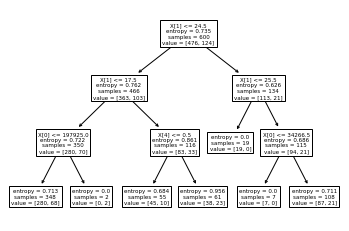

In [38]:
tree.plot_tree(model);

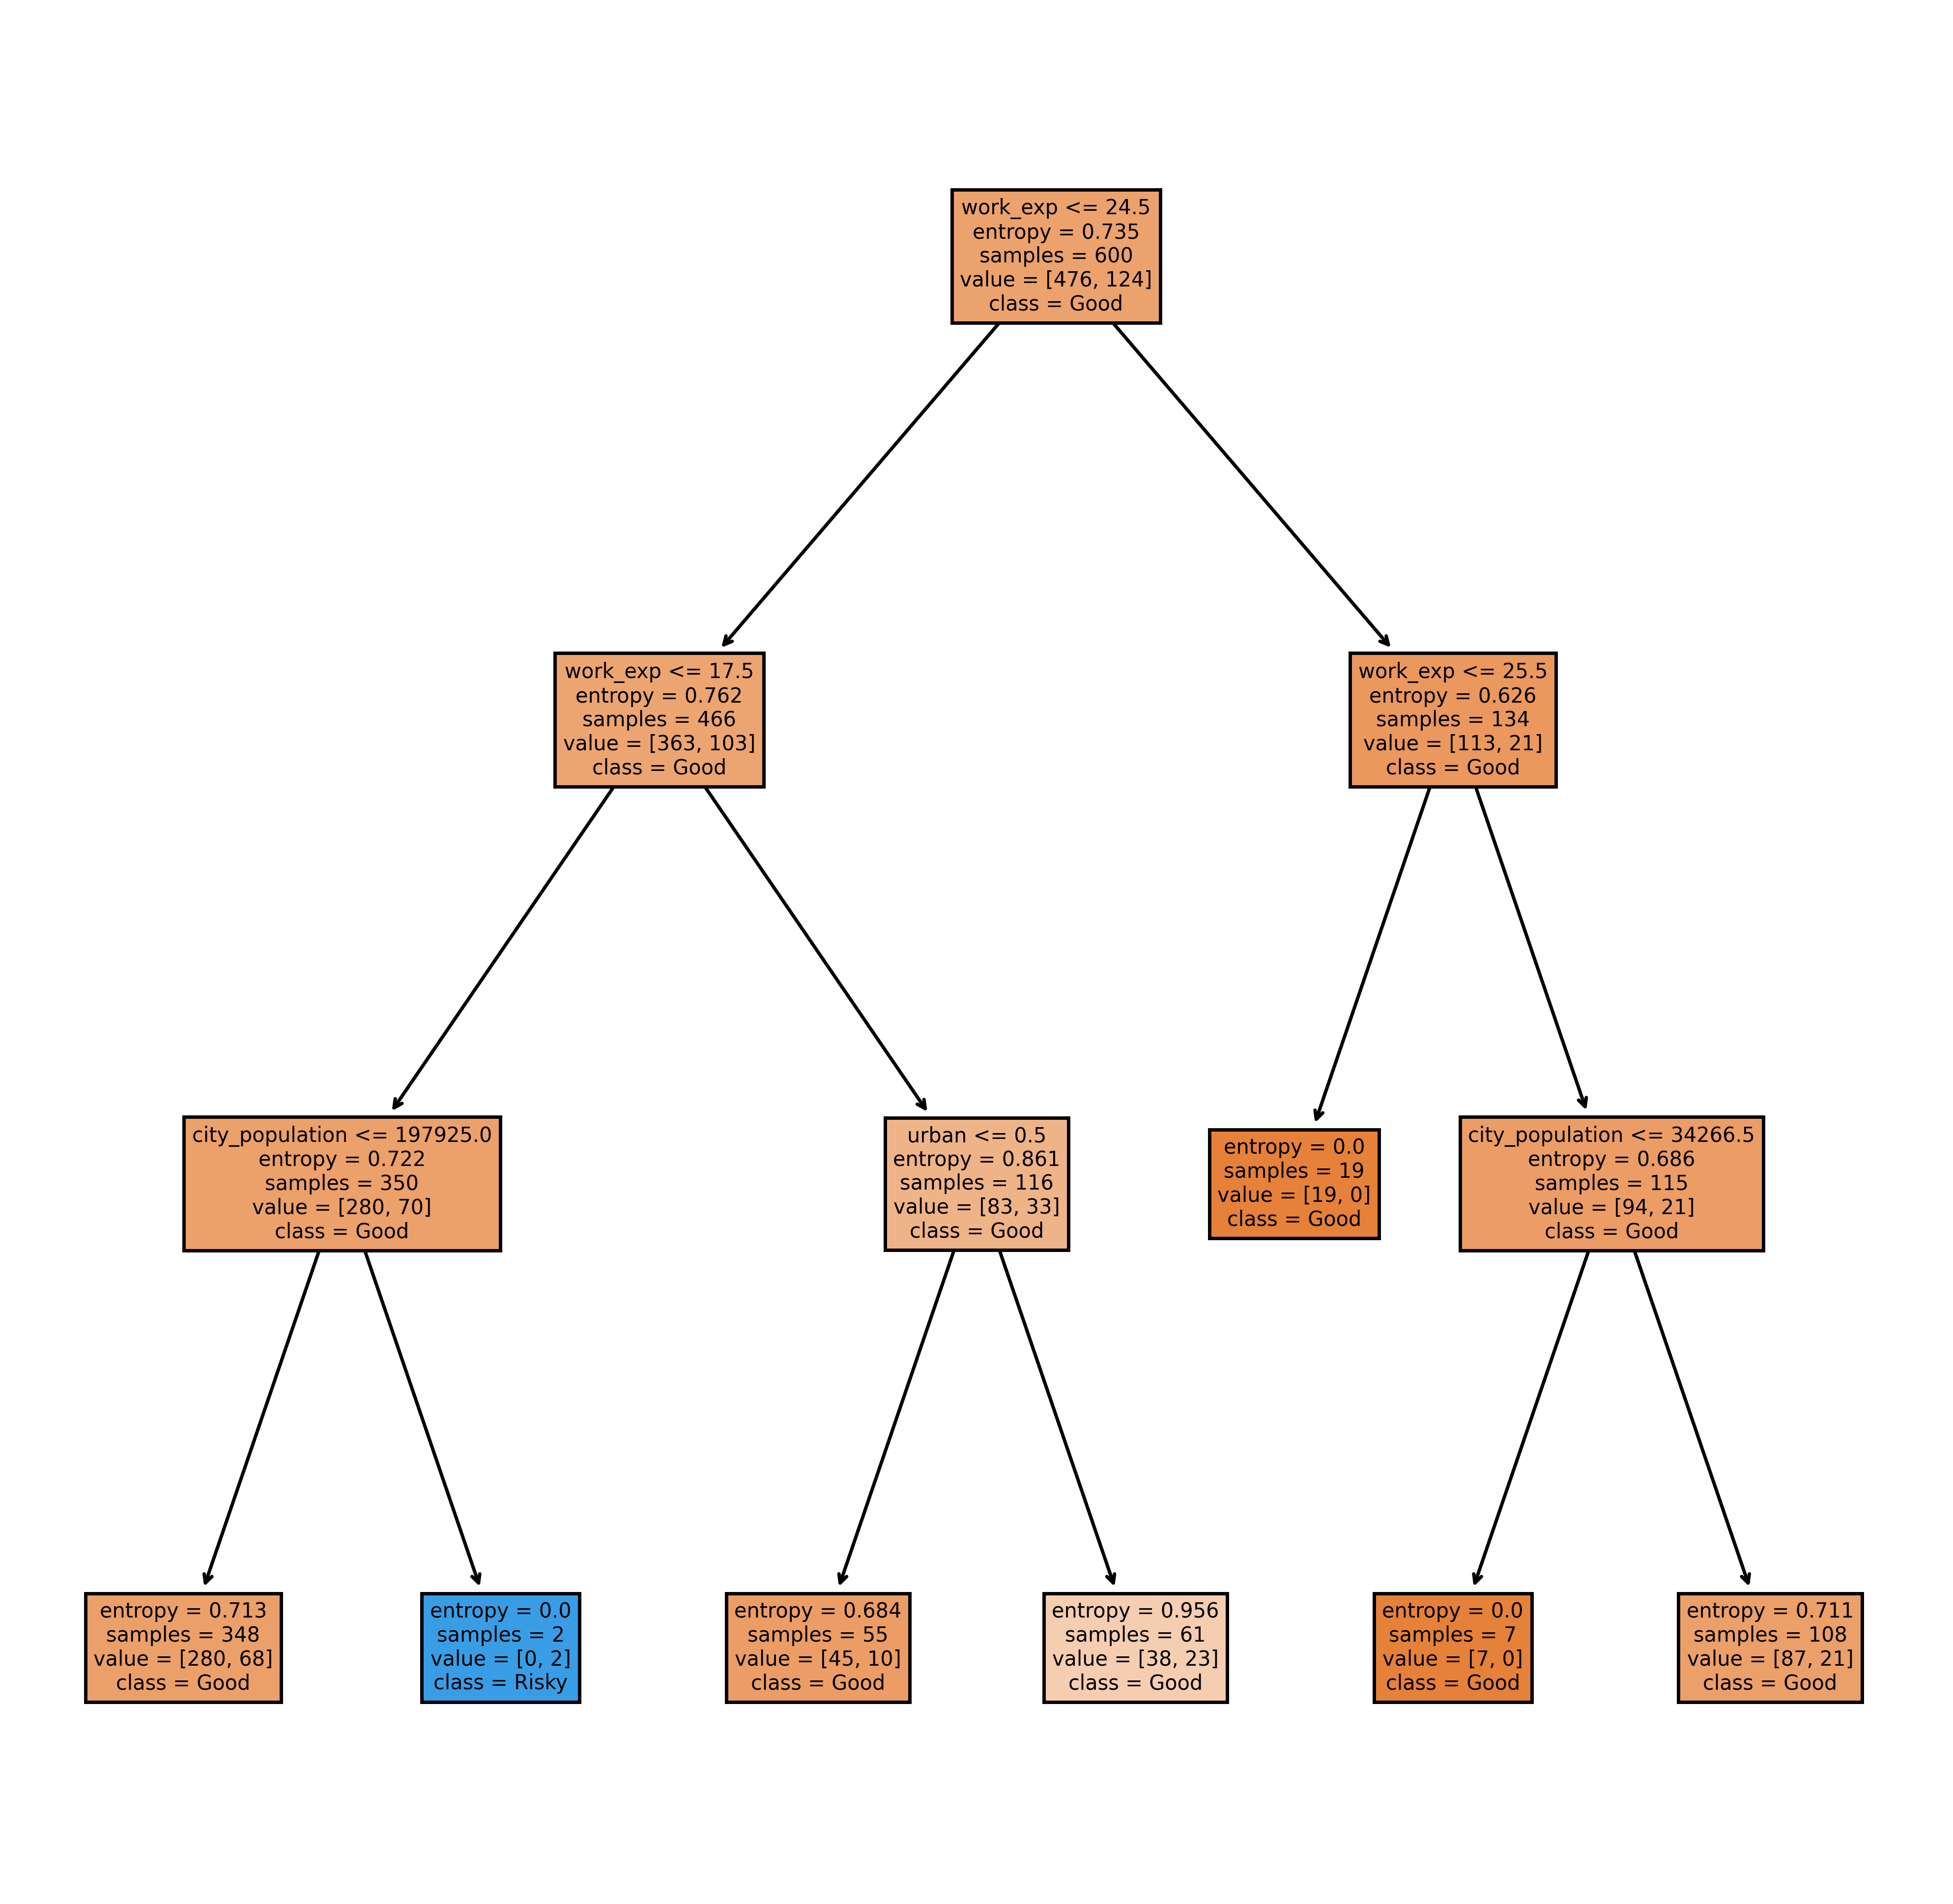

In [39]:
fn=['city_population','work_exp','Mar_status','Graduate','urban']
cn=['Good','Risky']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=500)
tree.plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    filled=True
);


#Decision tree Using Gini Criterion

In [45]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=2)
model1.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##K-Fold Cross Validation

In [49]:
cv = KFold(n_splits=10)
results = cross_val_score(model1,X,Y,cv=cv)

In [50]:
print(results.mean()*100)

78.83333333333333


##Plot Tree

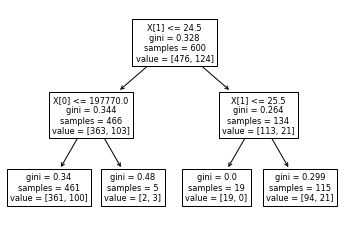

In [51]:
tree.plot_tree(model1);

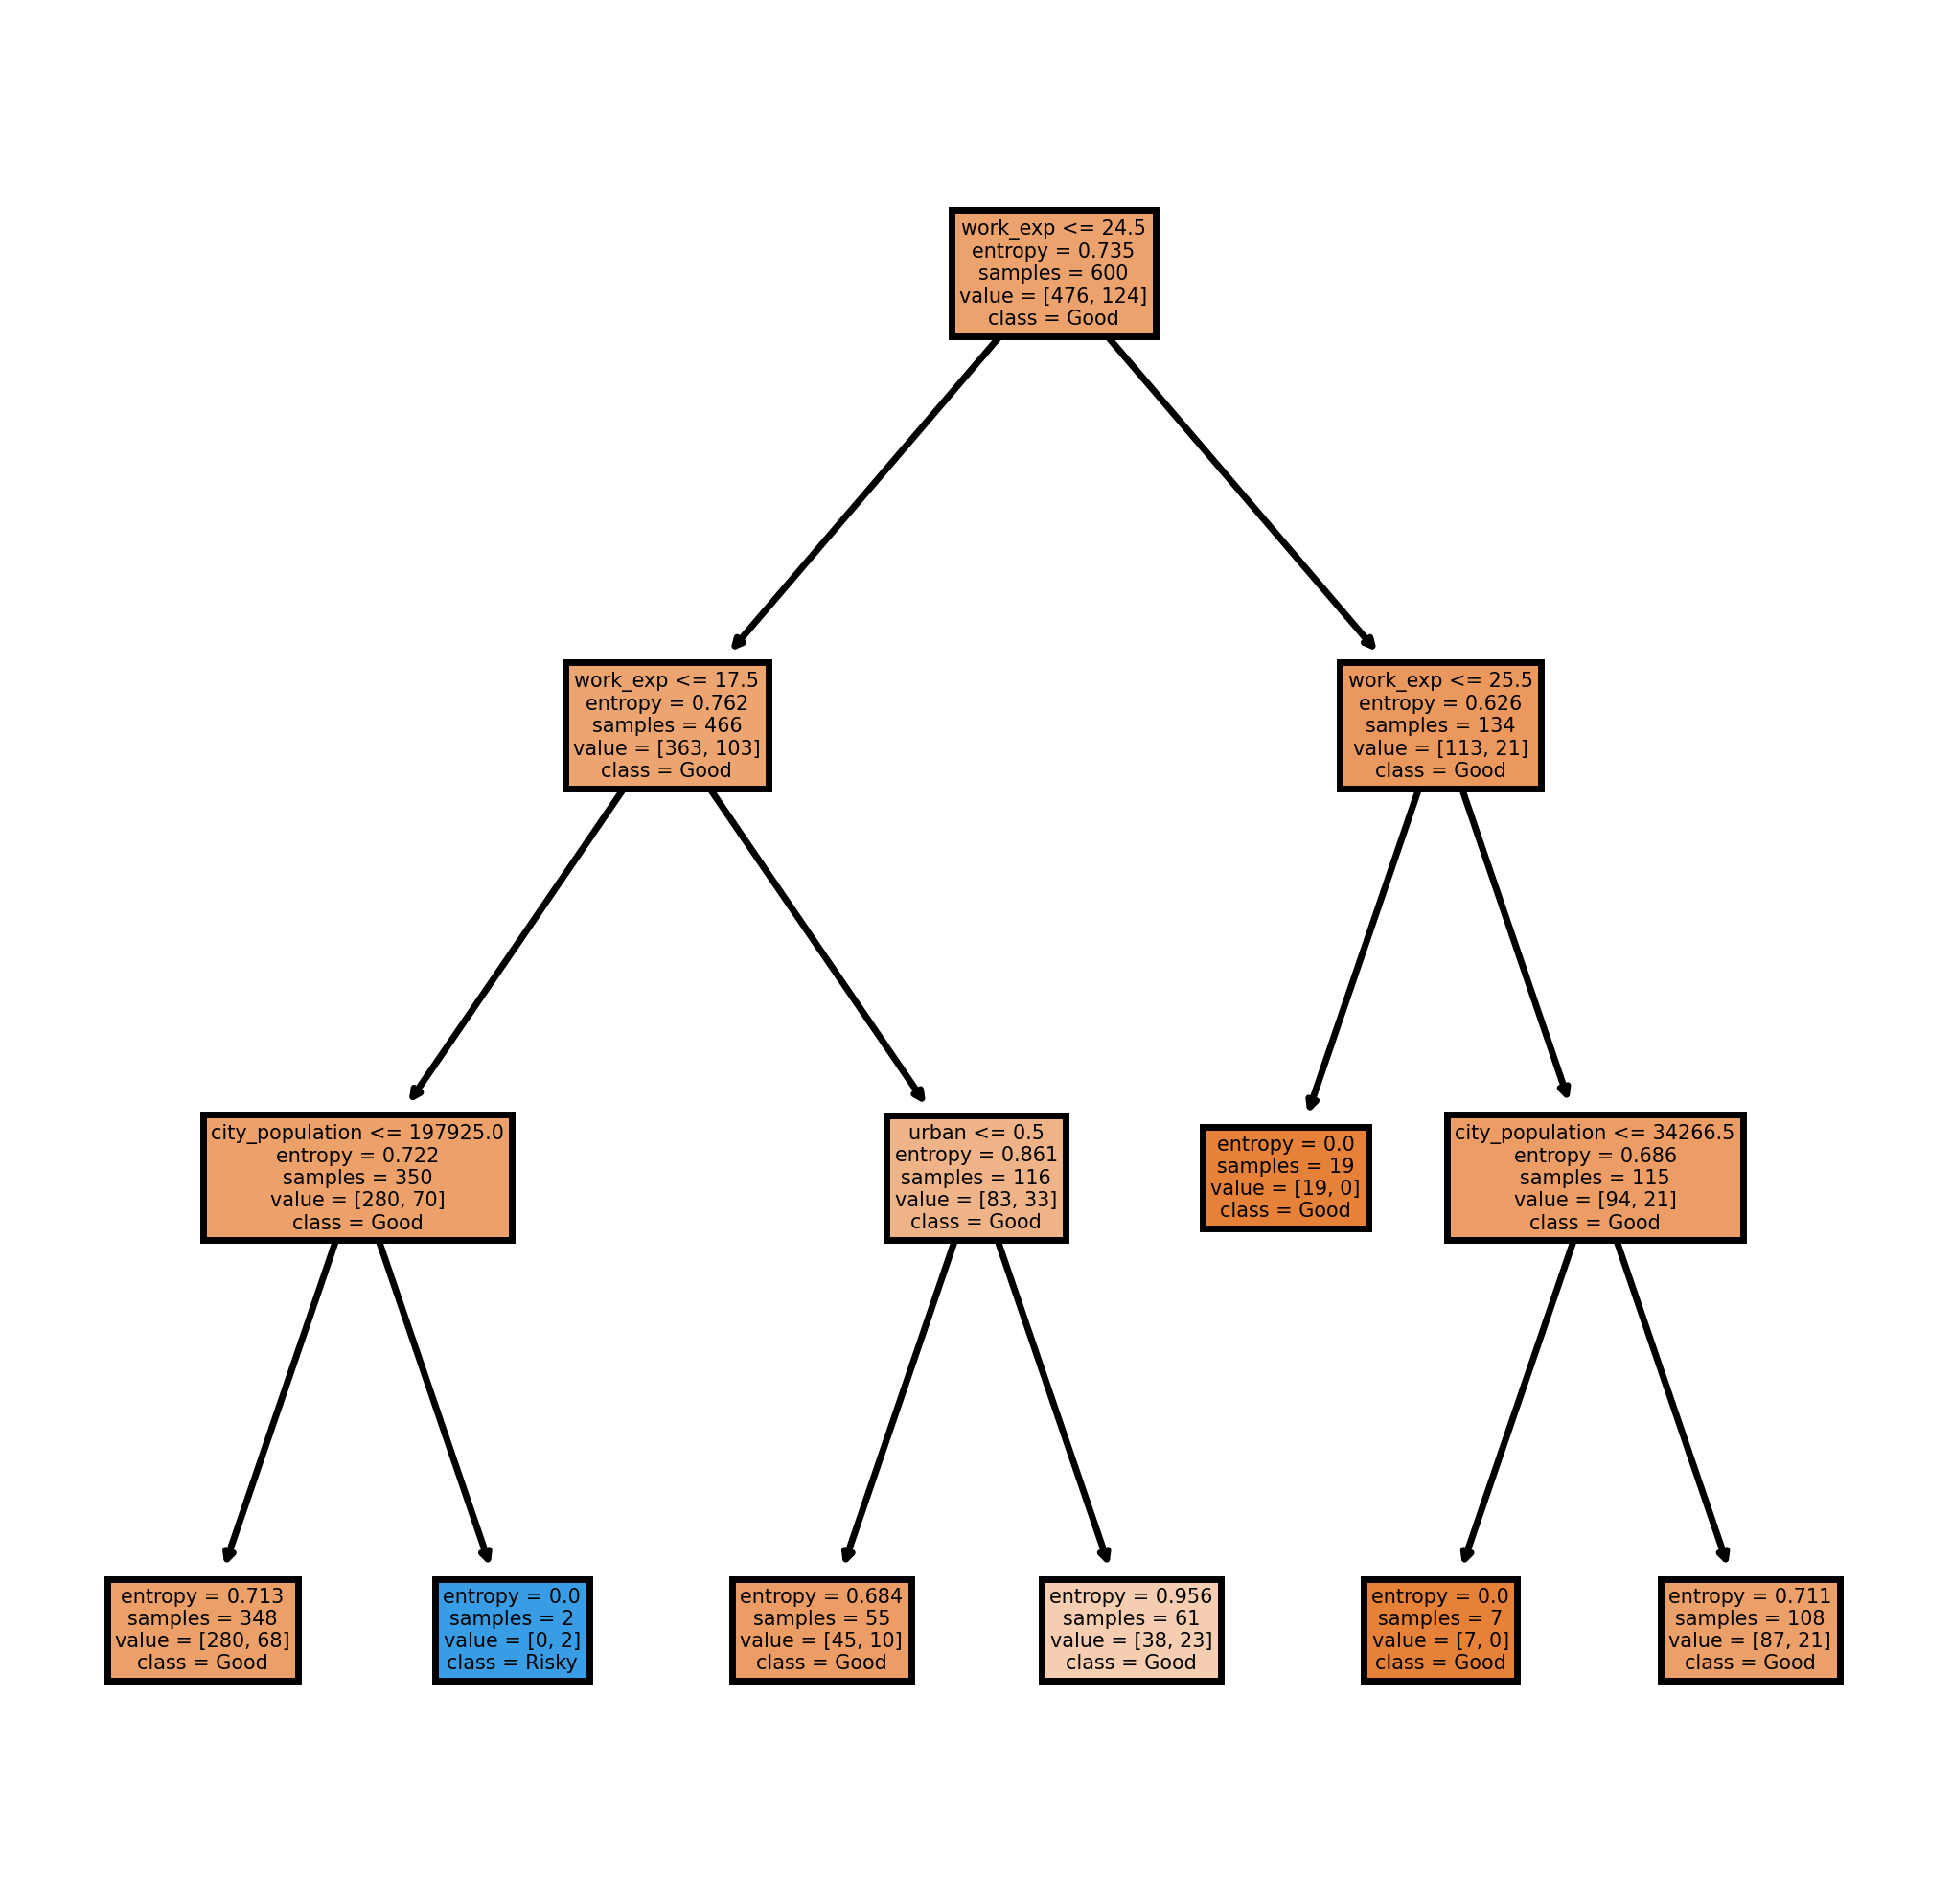

In [53]:
fn=['city_population','work_exp','Mar_status','Graduate','urban']
cn=['Good','Risky']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(
    model,
    feature_names=fn,
    class_names=cn,
    filled=True
);
